In [1]:
import numpy as np
import cv2
from keras.preprocessing import image
import time

import sys
import os
import glob
import re
import scipy
import tensorflow as tf
import align.detect_face



# Keras
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.models import load_model
from keras.preprocessing import image
from keras.models import model_from_json
from keras.preprocessing.image import ImageDataGenerator



Using TensorFlow backend.
/home/topica/anaconda3/envs/workspace/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/topica/anaconda3/envs/workspace/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
from keras.models import model_from_json
# model = model_from_json(open("/home/thaovu/tensorflow-101/model/facial_expression_model_structure.json", "r").read())
# model.load_weights('/home/thaovu/tensorflow-101/model/facial_expression_model_weights.h5') #load weights
model = model_from_json(open("/home/topica/workspace/Facial-Expression-Recognition/model_4layer_2_2_pool.json", "r").read())
model.load_weights('/home/topica/workspace/Facial-Expression-Recognition/model_4layer_2_2_pool.h5') #load weights

In [3]:
test_dir = "/home/topica/workspace/data_ckp_crop"

In [4]:
emotions = ["neutral", "anger", "contempt", "disgust", "fear", "happy", "sadness", "surprise"]

In [5]:
emotions = ['anger', 'disgust', 'fear', 'happy', 'sadness', 'surprise', 'neutral']

In [6]:
test_data =[]
test_label = []
for i in  range(len(emotions)):
    emotion_dir = os.path.join(test_dir,emotions[i])
    list_img = os.listdir(emotion_dir)
    for j in range(len(list_img)):
        img_dir = os.path.join(emotion_dir, list_img[i])
        img = image.load_img(img_dir, grayscale=True, target_size=(48, 48,1))
        x = image.img_to_array(img)
        test_data.append(x)
        test_label.append(i)

/home/topica/anaconda3/envs/workspace/lib/python3.6/site-packages/keras_preprocessing/image.py:489: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [7]:
test_data = np.asarray(test_data)
test_label = np.asarray(test_label)

In [8]:
from sklearn.preprocessing import label_binarize

In [9]:
test_label = label_binarize(test_label, classes=[0, 1, 2,3,4,5,6])

In [10]:
test_label

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [11]:
test_data.shape


(5021, 48, 48, 1)

In [12]:
test_label.shape

(5021, 7)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


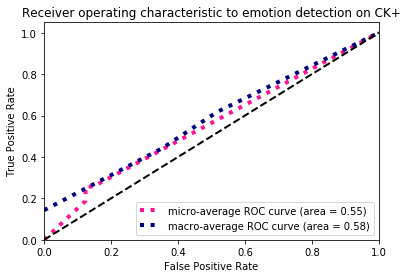

In [15]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
n_classes = 7
roc_auc = dict()
y_score = model.predict(test_data)
print(y_score)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_label[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_label.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

# colors = cycle(['aqua', 'darkorange', 'cornflowerblue','gray','olive', 'cyan','green', ])
# for i, color in zip(range(n_classes), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to emotion detection on CK+')
plt.legend(loc="lower right")
plt.show()


In [ ]:
model.predict(

In [ ]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(test_data).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_label, y_pred_keras)

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

In [ ]:
for m in range(len(img_list)):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #transform to gray scale
    img = cv2.resize(img, (48, 48)) #resize to 48x48

    img_pixels = image.img_to_array(img)
    img_pixels = np.expand_dims(img_pixels, axis = 0)

    img_pixels /= 255 #pixels are in scale of [0, 255]. normalize all pixels in scale of [0, 1]

    #-----------------------------

    predictions = model.predict(img_pixels) #store probabilities of 7 expressions
    max_index = np.argmax(predictions[0])

In [ ]:
faces